## Medical Health Insurance Premium Prediction
This project focuses on predicting medical health insurance costs using various regression models. The goal is to create a model that can accurately estimate the insurance costs for individuals based on their attributes. The project employs exploratory data analysis, data preprocessing, and several regression techniques to achieve this.

In [3]:
# importing required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [4]:
df = pd.read_csv('insurance_data.csv')

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
# check for missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

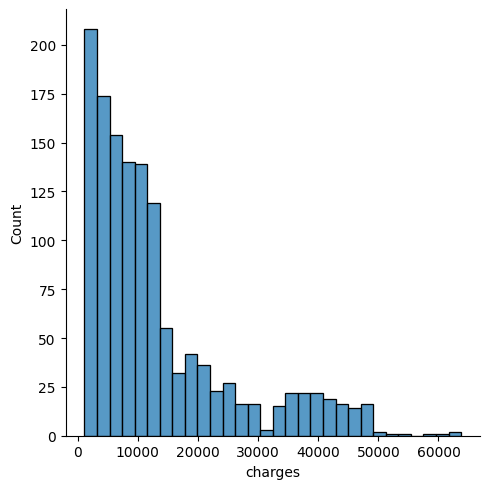

In [9]:
# EDA
# checking for skewness
skewed = sns.displot(df['charges'])
skewed

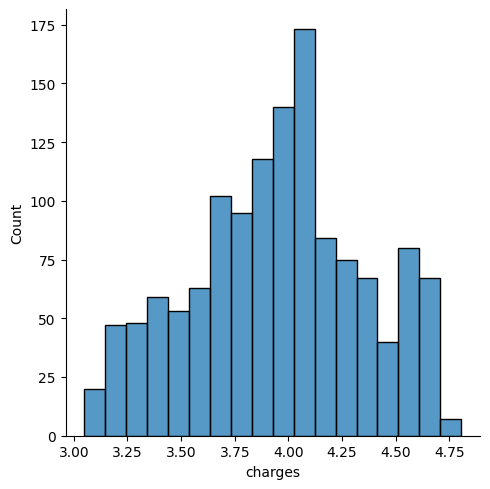

In [10]:
# charges are right skewd
# applying log transform to correct skewness
log_trans = sns.displot(np.log10(df['charges']))
log_trans

In [12]:
# converting categorical labels into numerical using LabelEncoder
from sklearn import preprocessing
labelencoder = preprocessing.LabelEncoder()

labelencoder.fit(df.sex.drop_duplicates())
df.sex = labelencoder.transform(df.sex)

labelencoder.fit(df.smoker.drop_duplicates())
df.smoker = labelencoder.transform(df.smoker)

labelencoder.fit(df.region.drop_duplicates())
df.region = labelencoder.transform(df.region)

In [13]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


<Axes: >

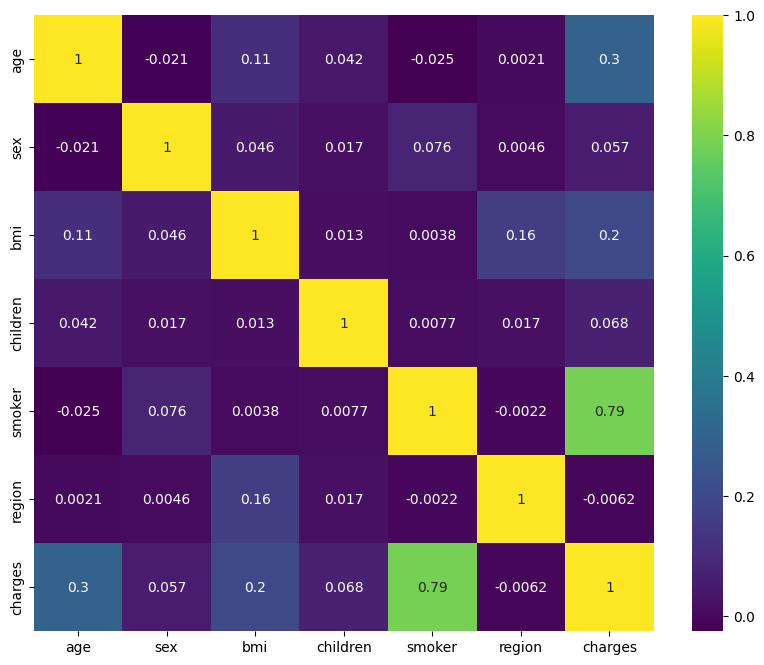

In [14]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),cmap='viridis',annot=True)

In [15]:
# split dataset into training and test
X = df.drop(['charges'], axis = 1)
y = df['charges']

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [17]:
# regression models
# multiple linear regression model
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [18]:
lr.fit(X_train, y_train)

LinearRegression()

In [19]:
import joblib

# Save the trained model with joblib
model_filename = 'regression_model.joblib'
joblib.dump(lr, model_filename)


['regression_model.joblib']

In [20]:
print("Intercept", lr.intercept_)
print("Coefficient", lr.coef_)
print("Score", lr.score(X_test, y_test))

Intercept -11946.606567263034
Coefficient [ 2.57056264e+02 -1.87914567e+01  3.35781491e+02  4.25091456e+02
  2.36478181e+04 -2.71284266e+02]
Score 0.7833463107364539


In [21]:
y_pred1 = lr.predict(X_test)

In [22]:
predicted1 = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred1})
predicted1.head()

,Actual,Predicted
764,9095.06825,8924.407244
887,5272.17580,7116.295018
890,29330.98315,36909.013521
1293,9301.89355,9507.874691
259,33750.29180,27013.350008


In [23]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [24]:
# random forest regressor
from sklearn.ensemble import RandomForestRegressor

In [25]:
rf_reg = RandomForestRegressor(n_estimators=100, criterion='squared_error', min_samples_split=2)

In [26]:
rf_reg.fit(X_train, y_train)

RandomForestRegressor()

In [27]:
print(rf_reg.score(X_test, y_test))

0.8620875819459466


In [30]:
import joblib

# Save the trained model with joblib
model_filename = 'random_forest_model.joblib'
joblib.dump(rf_reg, model_filename)


['random_forest_model.joblib']

In [31]:
y_pred2 = rf_reg.predict(X_test)

In [32]:
# actual and predicted values
predicted2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred2})
predicted2.head()

,Actual,Predicted
764,9095.06825,10603.794213
887,5272.17580,5319.662750
890,29330.98315,28328.383937
1293,9301.89355,10462.804901
259,33750.29180,34516.827576


In [33]:
# we select the best features using the feature importance from random forest regressor

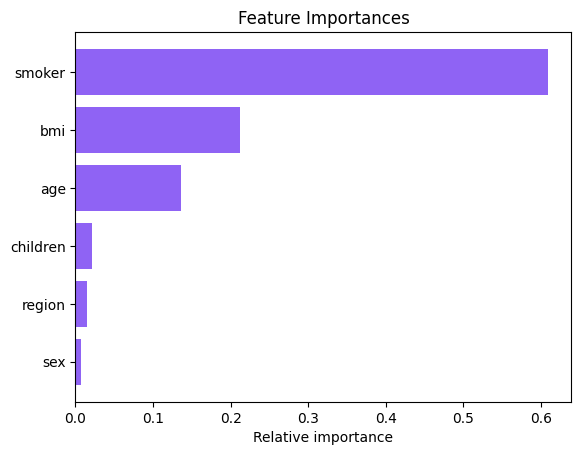

In [34]:
features = X.columns
importances = rf_reg.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='#8f63f4', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative importance')
plt.show()

In [35]:
# smoker, bmi and age are important

In [36]:
# now select only the important features
X = df.drop(['charges', 'children', 'region', 'sex'], axis = 1)
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [37]:
X

,age,bmi,smoker
0,19,27.900,1
1,18,33.770,0
2,28,33.000,0
3,33,22.705,0
4,32,28.880,0
...,...,...,...
1333,50,30.970,0
1334,18,31.920,0
1335,18,36.850,0
1336,21,25.800,0


In [38]:
# build a model using polynomial regression after feature importance

In [39]:
# polynomial regression model

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)

X_poly = poly_reg.fit_transform(X)

X_train,X_test,y_train,y_test = train_test_split(X_poly, y, test_size = 0.2, random_state = 0)

In [40]:
pol_reg = LinearRegression()
pol_reg.fit(X_train, y_train)

LinearRegression()

In [41]:
print(pol_reg.intercept_)
print(pol_reg.coef_)
print(pol_reg.score(X_test, y_test))

-6220.197801424454
[ 0.00000000e+00  7.03334822e+01  4.98130645e+02 -9.73998136e+03
  1.53678215e+00  2.40254198e+00  2.60895141e+00 -9.19302545e+00
  1.41047824e+03 -9.73998136e+03]
0.8773278585856426


In [42]:
y_pred3 = pol_reg.predict(X_test)

## Model Evaluation
- The performance of each regression model is evaluated using various metrics, including Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE).

In [43]:
from sklearn import metrics
from sklearn.metrics import r2_score

In [44]:
# Multiple Linear Regression
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred1))
print('Mean Square Error:', metrics.mean_squared_error(y_test, y_pred1))
print('Root Mean Square Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

Mean Absolute Error: 10976.93032415958
Mean Square Error: 225340349.96269003
Root Mean Square Error: 15011.340711698273


In [45]:
# Random forest regressor
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred2))
print('Mean Square Error:', metrics.mean_squared_error(y_test, y_pred2))
print('Root Mean Square Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

Mean Absolute Error: 11495.4729716699
Mean Square Error: 267228169.58026156
Root Mean Square Error: 16347.115023155051


In [46]:
# Polynomial Regression
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred3))
print('Mean Square Error:', metrics.mean_squared_error(y_test, y_pred3))
print('Root Mean Square Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))

Mean Absolute Error: 2792.5625203527165
Mean Square Error: 19520813.241241172
Root Mean Square Error: 4418.236440169445


In [47]:
## deployment
# create a pickle file using serialization
import pickle
pickle_out = open("rf_regressor.pkl", "wb")
pickle.dump(rf_reg, pickle_out)
pickle_out.close()

In [41]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [43]:
rf_reg.predict([[19,0,27,0,1,3]])

c:\Users\jayda\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([17021.7536265])